# <문제>

2021년 2월 Nexon에서는 모바일 게임을 기획하고자 모바일 게임 TF를 발족하였으며 

당신은 해당 팀의 분석가로 합류하게 되었습니다. 

당신은 프로젝트 기획단계에 필요한 시장 분석 요청을 받았으며 

아래 데이터를 이용하여 현재 시장의 경쟁 상황을 보고 오픈 시점을 결정하기 위한 기반 자료를 작성해야 합니다.

이에 한국의 모바일 게임 시장 상황을 분석하고 

어떤 장르의 게임을 어느 시점에 론칭하는 것이 타당한지 설명하는 자료를 작성해주시기 바랍니다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("mobileGameStat.csv", parse_dates=['App Release Date'], engine='python')
data.head()

,Rank,Category,Store,Device,Type,Country,Period,App ID,App Name,Value,...,App Release Date,Publisher Name,Company Name,Avg. rating - All,# of ratings - All,# of 5 stars - All,# of 4 stars - All,# of 3 stars - All,# of 2 stars - All,# of 1 stars - All
0,1,Games,Google Play,Google Play,Free,Australia,14-Dec,com.king.candycrushsodasaga,Candy Crush Soda Saga,142322,...,2014-06-10,King,King,4.3,1330386,814338,270163,115783,51896,78206
1,2,Games,Google Play,Google Play,Free,Australia,14-Dec,com.king.candycrushsaga,Candy Crush Saga,66453,...,2012-11-16,King,King,4.3,10255021,6729342,1820359,745026,324031,636263
2,3,Games,Google Play,Google Play,Free,Australia,14-Dec,air.au.com.metro.DumbWaysToDie2,Dumb Ways to Die 2: The Games,61576,...,2014-12-08,Metro Trains,Metro Trains,4.2,244649,156193,36249,20080,10502,21625
3,4,Games,Google Play,Google Play,Free,Australia,14-Dec,com.ketchapp.stickhero,Stick Hero,60031,...,2014-11-05,Ketchapp,Ketchapp Studio,4.0,310673,158330,66278,39428,18147,28490
4,5,Games,Google Play,Google Play,Free,Australia,14-Dec,com.kiloo.subwaysurf,Subway Surfers,59157,...,2012-09-20,Kiloo,Kiloo,4.4,11932177,8655626,1576101,705977,346631,647842


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85000 entries, 0 to 84999
Data columns (total 27 columns):
Rank                  85000 non-null int64
Category              85000 non-null object
Store                 85000 non-null object
Device                85000 non-null object
Type                  85000 non-null object
Country               85000 non-null object
Period                85000 non-null object
App ID                85000 non-null object
App Name              85000 non-null object
Value                 85000 non-null int64
Unit                  85000 non-null object
App IAP               85000 non-null bool
App Category          69434 non-null object
App Device            85000 non-null object
App Start Price       80695 non-null float64
App End Price         85000 non-null float64
App Avg. Price        85000 non-null float64
App Release Date      85000 non-null datetime64[ns]
Publisher Name        85000 non-null object
Company Name          85000 non-null object
Avg.

In [4]:
data.describe()

,Rank,Value,App Start Price,App End Price,App Avg. Price,Avg. rating - All,# of ratings - All,# of 5 stars - All,# of 4 stars - All,# of 3 stars - All,# of 2 stars - All,# of 1 stars - All
count,85000.00000,8.500000e+04,80695.000000,85000.000000,85000.000000,85000.000000,8.500000e+04,8.500000e+04,8.500000e+04,85000.000000,85000.000000,85000.000000
mean,50.50000,1.775887e+05,1.329470,1.302008,1.314851,4.220568,5.193177e+05,3.607211e+05,7.687289e+04,34028.600765,15619.448576,32075.683576
std,28.86624,1.093823e+06,4.754152,3.738470,3.217266,0.354955,1.370753e+06,9.772600e+05,2.009232e+05,85521.426361,39626.803813,77579.574649
min,1.00000,3.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,25.75000,6.480000e+02,0.000000,0.000000,0.000000,4.100000,8.834000e+03,5.257000e+03,1.325750e+03,596.000000,270.000000,617.000000
50%,50.50000,8.052000e+03,0.000000,0.000000,0.000000,4.300000,5.079500e+04,3.270400e+04,7.490000e+03,3571.000000,1672.000000,4207.000000
75%,75.25000,9.017525e+04,1.190000,1.190000,1.692500,4.400000,3.110120e+05,2.042900e+05,4.960200e+04,24245.000000,10430.000000,23407.000000
max,100.00000,5.109463e+07,449.000000,442.080000,232.290000,5.000000,1.283882e+07,9.298820e+06,1.912303e+06,784807.000000,378226.000000,706779.000000


In [5]:
col=data.columns
col

Index(['Rank', 'Category', 'Store', 'Device', 'Type', 'Country', 'Period',
       'App ID', 'App Name', 'Value', 'Unit', 'App IAP', 'App Category',
       'App Device', 'App Start Price', 'App End Price', 'App Avg. Price',
       'App Release Date', 'Publisher Name', 'Company Name',
       'Avg. rating - All', '# of ratings - All', '# of 5 stars - All',
       '# of 4 stars - All', '# of 3 stars - All', '# of 2 stars - All',
       '# of 1 stars - All'],
      dtype='object')

In [6]:
data.Rank.value_counts()

63     850
82     850
77     850
14     850
78     850
      ... 
35     850
99     850
36     850
100    850
64     850
Name: Rank, Length: 100, dtype: int64

## 컬럼 값들 중 불변한 속성(랭킹에 영향을 덜받는)을 지닌 컬럼 제거

'Category' : 상위카테고리 - Games

'Store' : 앱스토어 명칭 - Google Play

'Device' : 디바이스명 - Google Play

*'Country' : 국가명 - South Korea

'App ID' : 게임 애플리케이션 아이디 - Nexon

'App Name' : 게임명 - 

'App Device' : 디바이스 버전

'Publisher Name' : 퍼블리셔 이름 - Nexon

'Company Name' : 개발자 이름 - Nexon

In [7]:
data.Category.value_counts()

Games    85000
Name: Category, dtype: int64

In [8]:
data.Store.value_counts()

Google Play    85000
Name: Store, dtype: int64

In [9]:
data.Device.value_counts()

Google Play    85000
Name: Device, dtype: int64

In [10]:
data.Country.value_counts()

South Korea             7500
Thailand                7200
United States           7200
Japan                   7200
ALL                     1500
Austria                 1200
Spain                   1200
Belgium                 1200
Indonesia               1200
South Africa            1200
Switzerland             1200
Vietnam                 1200
Australia               1200
Taiwan                  1200
Egypt                   1200
Ukraine                 1200
Hungary                 1200
Germany                 1200
Brazil                  1200
Romania                 1200
Turkey                  1200
Canada                  1200
Malaysia                1200
Denmark                 1200
Philippines             1200
Poland                  1200
Chile                   1200
France                  1200
Israel                  1200
New Zealand             1200
Greece                  1200
Kuwait                  1200
Portugal                1200
Mexico                  1200
India         

In [11]:
data['App ID'].value_counts()

com.king.candycrushsaga                  522
com.mojang.minecraftpe                   490
com.supercell.clashofclans               486
com.kiloo.subwaysurf                     453
com.supercell.hayday                     449
                                        ... 
com.voltage.joshige.suite                  1
air.com.blueinter.google.KingSamM          1
co.kr.gameus.canimalwars                   1
com.cassieapp.ideas.minecraftairplane      1
com.ylcsoft.brokenheartvs                  1
Name: App ID, Length: 7960, dtype: int64

In [12]:
data['App Name'].value_counts()

Candy Crush Saga              522
Minecraft - Pocket Edition    490
Clash of Clans                486
Subway Surfers                453
Hay Day                       449
                             ... 
CRプレミアム海物語                      1
TowerMadness 2: 3D TD           1
Death Drive                     1
Dの海賊                            1
Zombie Hunter                   1
Name: App Name, Length: 8010, dtype: int64

In [13]:
data['App Device'].value_counts()

2.3 and up            28679
2.3.3 and up          15413
2.2 and up            14840
4.0 and up             6906
Varies with device     5901
2.1 and up             3408
4.0.3 and up           3076
3.0 and up             2158
1.6 and up             1644
2.0 and up              804
2.0.1 and up            653
4.1 and up              462
1.5 and up              402
3.2 and up              265
4.2 and up              114
1.1 and up               75
2.3 - 4.4                59
3.1 and up               48
2.3 - 5.0                25
2.2 - 4.4                23
2.3 - 4.3                 9
2.2 - 4.2                 8
4.3 and up                6
1.0 and up                5
4.4 and up                3
2.3.3 - 4.4W              3
2.3.3 - 4.4               2
2.3.3 - 5.0               2
1.6 - 4.4                 2
2.3 - 4.2                 2
4.0 - 4.3                 1
1.6 - 5.0                 1
2.2 - 5.0                 1
Name: App Device, dtype: int64

In [14]:
data['Publisher Name'].value_counts()

Gameloft             4075
King                 2258
EA Mobile            1410
ELECTRONIC ARTS      1367
Rovio Mobile Ltd.    1290
                     ... 
Qikuyx Inc.             1
Primary Games Ltd       1
ForteGames              1
POLY E&M Inc.           1
TreeNuts                1
Name: Publisher Name, Length: 3930, dtype: int64

In [15]:
data['Company Name'].value_counts()

Gameloft           4075
King               2524
Electronic Arts    2339
Firemint           1367
Rovio              1345
                   ... 
enish                 1
momoStorm             1
Pilot Fish            1
RacoonSoft            1
MAIET                 1
Name: Company Name, Length: 3880, dtype: int64

In [16]:
data=data.drop(['Category', 'Store', 'Device', 'Country', 'App ID', 'App Name', 'App Device', 'Publisher Name', 'Company Name'], axis='columns')
data.head()

,Rank,Type,Period,Value,Unit,App IAP,App Category,App Start Price,App End Price,App Avg. Price,App Release Date,Avg. rating - All,# of ratings - All,# of 5 stars - All,# of 4 stars - All,# of 3 stars - All,# of 2 stars - All,# of 1 stars - All
0,1,Free,14-Dec,142322,Downloads,True,Games Casual,0.0,0.0,0.0,2014-06-10,4.3,1330386,814338,270163,115783,51896,78206
1,2,Free,14-Dec,66453,Downloads,True,Games Casual,0.0,0.0,0.0,2012-11-16,4.3,10255021,6729342,1820359,745026,324031,636263
2,3,Free,14-Dec,61576,Downloads,True,Games Casual,NaN,0.0,0.0,2014-12-08,4.2,244649,156193,36249,20080,10502,21625
3,4,Free,14-Dec,60031,Downloads,True,Games Arcade,0.0,0.0,0.0,2014-11-05,4.0,310673,158330,66278,39428,18147,28490
4,5,Free,14-Dec,59157,Downloads,True,Games Arcade,0.0,0.0,0.0,2012-09-20,4.4,11932177,8655626,1576101,705977,346631,647842


## 결측치 채우기

In [17]:
category=list(data['App Category'].unique())
len(category)

26

In [18]:
category_dict=dict(pd.Series(category))
category_dict

{0: 'Games Casual',
 1: 'Games Arcade',
 2: 'Games Strategy',
 3: 'Games Action',
 4: 'Games Sports',
 5: 'Games Music',
 6: 'Games Card',
 7: 'Games Racing',
 8: 'Games Trivia',
 9: 'Games Role Playing',
 10: 'Games Word',
 11: 'Games Simulation',
 12: 'Games Casino',
 13: 'Games Puzzle',
 14: 'Games Family',
 15: 'Games Adventure',
 16: 'Games Board',
 17: 'Games Educational',
 18: 'Education',
 19: 'Entertainment',
 20: nan,
 21: 'Games Arcade & Action',
 22: 'Music & Audio',
 23: 'Games Brain & Puzzle',
 24: 'Social',
 25: 'Health & Fitness'}

In [19]:
category_dict={v:k for k, v in category_dict.items()}
category_dict

{'Games Casual': 0,
 'Games Arcade': 1,
 'Games Strategy': 2,
 'Games Action': 3,
 'Games Sports': 4,
 'Games Music': 5,
 'Games Card': 6,
 'Games Racing': 7,
 'Games Trivia': 8,
 'Games Role Playing': 9,
 'Games Word': 10,
 'Games Simulation': 11,
 'Games Casino': 12,
 'Games Puzzle': 13,
 'Games Family': 14,
 'Games Adventure': 15,
 'Games Board': 16,
 'Games Educational': 17,
 'Education': 18,
 'Entertainment': 19,
 nan: 20,
 'Games Arcade & Action': 21,
 'Music & Audio': 22,
 'Games Brain & Puzzle': 23,
 'Social': 24,
 'Health & Fitness': 25}

In [20]:
data['App Category'].value_counts()

Games Action             8590
Games Arcade             8290
Games Casual             7718
Games Strategy           7123
Games Role Playing       5967
Games Puzzle             5168
Games Racing             4622
Games Simulation         4479
Games Sports             4064
Games Casino             3211
Games Adventure          2700
Games Card               2141
Games Family             1221
Games Trivia             1091
Games Board               971
Games Word                585
Games Music               508
Games Arcade & Action     397
Games Educational         337
Games Brain & Puzzle      158
Social                     54
Entertainment              19
Music & Audio              18
Health & Fitness            1
Education                   1
Name: App Category, dtype: int64

In [21]:
data['App Category']=data['App Category'].map(category_dict)

In [22]:
data.head()

,Rank,Type,Period,Value,Unit,App IAP,App Category,App Start Price,App End Price,App Avg. Price,App Release Date,Avg. rating - All,# of ratings - All,# of 5 stars - All,# of 4 stars - All,# of 3 stars - All,# of 2 stars - All,# of 1 stars - All
0,1,Free,14-Dec,142322,Downloads,True,0,0.0,0.0,0.0,2014-06-10,4.3,1330386,814338,270163,115783,51896,78206
1,2,Free,14-Dec,66453,Downloads,True,0,0.0,0.0,0.0,2012-11-16,4.3,10255021,6729342,1820359,745026,324031,636263
2,3,Free,14-Dec,61576,Downloads,True,0,NaN,0.0,0.0,2014-12-08,4.2,244649,156193,36249,20080,10502,21625
3,4,Free,14-Dec,60031,Downloads,True,1,0.0,0.0,0.0,2014-11-05,4.0,310673,158330,66278,39428,18147,28490
4,5,Free,14-Dec,59157,Downloads,True,1,0.0,0.0,0.0,2012-09-20,4.4,11932177,8655626,1576101,705977,346631,647842


In [23]:
data[data['App Category'].isnull()]

,Rank,Type,Period,Value,Unit,App IAP,App Category,App Start Price,App End Price,App Avg. Price,App Release Date,Avg. rating - All,# of ratings - All,# of 5 stars - All,# of 4 stars - All,# of 3 stars - All,# of 2 stars - All,# of 1 stars - All


In [24]:
data[data['App Start Price'].isnull()]

,Rank,Type,Period,Value,Unit,App IAP,App Category,App Start Price,App End Price,App Avg. Price,App Release Date,Avg. rating - All,# of ratings - All,# of 5 stars - All,# of 4 stars - All,# of 3 stars - All,# of 2 stars - All,# of 1 stars - All
2,3,Free,14-Dec,61576,Downloads,True,0,NaN,0.0,0.0,2014-12-08,4.2,244649,156193,36249,20080,10502,21625
9,10,Free,14-Dec,40111,Downloads,True,6,NaN,0.0,0.0,2014-12-23,3.4,5,1,2,1,0,1
31,32,Free,14-Dec,27517,Downloads,True,7,NaN,0.0,0.0,2014-12-10,4.4,17721,11781,3261,1229,456,994
40,41,Free,14-Dec,25252,Downloads,True,12,NaN,0.0,0.0,2014-12-03,4.3,4070,2881,492,199,117,381
54,55,Free,14-Dec,20883,Downloads,True,3,NaN,0.0,0.0,2014-12-02,3.5,28125,12005,4369,3574,2297,5880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84951,52,Grossing,15-Jan,253237,USD,True,3,NaN,0.0,0.0,2015-01-17,4.5,45622,32867,7253,3081,708,1713
84968,69,Grossing,15-Jan,163199,USD,True,9,NaN,0.0,0.0,2015-01-05,4.2,19300,10989,4719,1953,465,1174
84976,77,Grossing,15-Jan,135641,USD,True,9,NaN,0.0,0.0,2015-01-05,4.1,11650,6732,2145,1204,339,1230
84982,83,Grossing,15-Jan,128867,USD,True,13,NaN,0.0,0.0,2015-01-05,4.3,17090,10244,3493,2215,478,660


In [25]:
data['App Start Price']=np.where(data['App Start Price'].isnull(), data['App Avg. Price'], data['App Start Price'])

In [26]:
data[data['App Start Price'].isnull()]

,Rank,Type,Period,Value,Unit,App IAP,App Category,App Start Price,App End Price,App Avg. Price,App Release Date,Avg. rating - All,# of ratings - All,# of 5 stars - All,# of 4 stars - All,# of 3 stars - All,# of 2 stars - All,# of 1 stars - All


data=data.fillna(method='ffill')
data.head()

## Period, App Release Date 열 분할

In [27]:
data.Period.value_counts()

14-Dec    15100
14-Nov    15100
14-Oct    15100
14-Sep    15100
14-Feb     1200
13-Jul     1200
14-Mar     1200
13-Aug     1200
13-Jan     1200
13-Nov     1200
14-Aug     1200
13-Sep     1200
14-Jul     1200
13-Apr     1200
13-Dec     1200
14-Jun     1200
14-Apr     1200
13-Mar     1200
13-Oct     1200
13-Feb     1200
13-May     1200
14-Jan     1200
13-Jun     1200
14-May     1200
15-Jan      600
Name: Period, dtype: int64

In [28]:
data['Period Month']=data['Period'].str.extract(r'([a-zA-Z]+)')
data.head()

,Rank,Type,Period,Value,Unit,App IAP,App Category,App Start Price,App End Price,App Avg. Price,App Release Date,Avg. rating - All,# of ratings - All,# of 5 stars - All,# of 4 stars - All,# of 3 stars - All,# of 2 stars - All,# of 1 stars - All,Period Month
0,1,Free,14-Dec,142322,Downloads,True,0,0.0,0.0,0.0,2014-06-10,4.3,1330386,814338,270163,115783,51896,78206,Dec
1,2,Free,14-Dec,66453,Downloads,True,0,0.0,0.0,0.0,2012-11-16,4.3,10255021,6729342,1820359,745026,324031,636263,Dec
2,3,Free,14-Dec,61576,Downloads,True,0,0.0,0.0,0.0,2014-12-08,4.2,244649,156193,36249,20080,10502,21625,Dec
3,4,Free,14-Dec,60031,Downloads,True,1,0.0,0.0,0.0,2014-11-05,4.0,310673,158330,66278,39428,18147,28490,Dec
4,5,Free,14-Dec,59157,Downloads,True,1,0.0,0.0,0.0,2012-09-20,4.4,11932177,8655626,1576101,705977,346631,647842,Dec


In [29]:
data['Period Month'].value_counts()

Nov    16300
Sep    16300
Oct    16300
Dec    16300
Jan     3000
Aug     2400
May     2400
Feb     2400
Apr     2400
Jun     2400
Jul     2400
Mar     2400
Name: Period Month, dtype: int64

In [30]:
month_dict={'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}

In [31]:
data['Period Month']=data['Period Month'].map(month_dict)

In [32]:
data['App Release Date'].value_counts()

2013-09-30    747
2013-01-24    660
2012-09-20    624
2014-04-17    617
2013-12-11    587
             ... 
2014-07-11      1
2011-05-25      1
2012-05-26      1
2012-09-23      1
2014-04-19      1
Name: App Release Date, Length: 1171, dtype: int64

In [33]:
data['App Release Year']=data['App Release Date'].dt.year
data['App Release Month']=data['App Release Date'].dt.month
data['App Release Day']=data['App Release Date'].dt.day
data.head()

,Rank,Type,Period,Value,Unit,App IAP,App Category,App Start Price,App End Price,App Avg. Price,...,# of ratings - All,# of 5 stars - All,# of 4 stars - All,# of 3 stars - All,# of 2 stars - All,# of 1 stars - All,Period Month,App Release Year,App Release Month,App Release Day
0,1,Free,14-Dec,142322,Downloads,True,0,0.0,0.0,0.0,...,1330386,814338,270163,115783,51896,78206,12,2014,6,10
1,2,Free,14-Dec,66453,Downloads,True,0,0.0,0.0,0.0,...,10255021,6729342,1820359,745026,324031,636263,12,2012,11,16
2,3,Free,14-Dec,61576,Downloads,True,0,0.0,0.0,0.0,...,244649,156193,36249,20080,10502,21625,12,2014,12,8
3,4,Free,14-Dec,60031,Downloads,True,1,0.0,0.0,0.0,...,310673,158330,66278,39428,18147,28490,12,2014,11,5
4,5,Free,14-Dec,59157,Downloads,True,1,0.0,0.0,0.0,...,11932177,8655626,1576101,705977,346631,647842,12,2012,9,20


In [34]:
data=data.drop(['Period', 'App Release Date'], axis='columns')
data.head()

,Rank,Type,Value,Unit,App IAP,App Category,App Start Price,App End Price,App Avg. Price,Avg. rating - All,# of ratings - All,# of 5 stars - All,# of 4 stars - All,# of 3 stars - All,# of 2 stars - All,# of 1 stars - All,Period Month,App Release Year,App Release Month,App Release Day
0,1,Free,142322,Downloads,True,0,0.0,0.0,0.0,4.3,1330386,814338,270163,115783,51896,78206,12,2014,6,10
1,2,Free,66453,Downloads,True,0,0.0,0.0,0.0,4.3,10255021,6729342,1820359,745026,324031,636263,12,2012,11,16
2,3,Free,61576,Downloads,True,0,0.0,0.0,0.0,4.2,244649,156193,36249,20080,10502,21625,12,2014,12,8
3,4,Free,60031,Downloads,True,1,0.0,0.0,0.0,4.0,310673,158330,66278,39428,18147,28490,12,2014,11,5
4,5,Free,59157,Downloads,True,1,0.0,0.0,0.0,4.4,11932177,8655626,1576101,705977,346631,647842,12,2012,9,20


## 불필요한 컬럼 (평균 값 대체 가능) 제외

In [35]:
data['# of 5 stars - All'].value_counts()

5971921    100
5183654    100
6411653     99
7194081     99
2635061     97
          ... 
133433       1
3539         1
15829        1
4666         1
13832        1
Name: # of 5 stars - All, Length: 16848, dtype: int64

In [36]:
data['# of 4 stars - All'].value_counts()

0        223
1        163
3        142
2        108
363      107
        ... 
23876      1
68910      1
3768       1
4199       1
6616       1
Name: # of 4 stars - All, Length: 11753, dtype: int64

In [37]:
data['# of 3 stars - All'].value_counts()

0        318
2        213
1        208
22       187
4        168
        ... 
18593      1
4685       1
4330       1
10826      1
2047       1
Name: # of 3 stars - All, Length: 9476, dtype: int64

In [38]:
data['# of 2 stars - All'].value_counts()

0        564
1        379
9        271
3        269
2        269
        ... 
3855       1
5964       1
3919       1
13544      1
6441       1
Name: # of 2 stars - All, Length: 6773, dtype: int64

In [39]:
data['# of 1 stars - All'].value_counts()

0        380
1        212
2        193
4        161
6        156
        ... 
3468       1
23224      1
38175      1
1293       1
8273       1
Name: # of 1 stars - All, Length: 9490, dtype: int64

In [40]:
data=data.drop(['# of 1 stars - All', '# of 2 stars - All', '# of 3 stars - All', '# of 4 stars - All', '# of 5 stars - All'], axis='columns')
data.head()

,Rank,Type,Value,Unit,App IAP,App Category,App Start Price,App End Price,App Avg. Price,Avg. rating - All,# of ratings - All,Period Month,App Release Year,App Release Month,App Release Day
0,1,Free,142322,Downloads,True,0,0.0,0.0,0.0,4.3,1330386,12,2014,6,10
1,2,Free,66453,Downloads,True,0,0.0,0.0,0.0,4.3,10255021,12,2012,11,16
2,3,Free,61576,Downloads,True,0,0.0,0.0,0.0,4.2,244649,12,2014,12,8
3,4,Free,60031,Downloads,True,1,0.0,0.0,0.0,4.0,310673,12,2014,11,5
4,5,Free,59157,Downloads,True,1,0.0,0.0,0.0,4.4,11932177,12,2012,9,20


## 평점 데이터 전처리

In [41]:
data['Avg. rating - All'].value_counts()

4.4    14695
4.3    12882
4.2    11868
4.5     8133
4.1     7610
4.6     6249
4.0     4688
3.9     3414
4.7     3319
3.8     3170
3.7     1922
3.6     1441
3.5     1085
3.4     1032
4.8     1018
3.3      639
3.2      369
4.9      306
3.1      271
3.0      225
2.9      147
2.6      107
2.8       95
5.0       66
2.5       48
2.7       47
0.0       35
2.4       34
2.2       22
2.3       22
2.0       13
1.8        7
1.0        7
2.1        5
1.6        4
1.9        4
1.5        1
Name: Avg. rating - All, dtype: int64

In [42]:
data['Avg. rating - All']=np.where(data['Avg. rating - All']>=4.0, 4, np.where(data['Avg. rating - All']>=3.0, 3, np.where(data['Avg. rating - All']>=2.0, 2, 1)))
data['Avg. rating - All'].value_counts()

4    70834
3    13568
2      540
1       58
Name: Avg. rating - All, dtype: int64

In [43]:
data['# of ratings - All'].value_counts()

6696611    100
7719771    100
8286905     99
9282834     99
3715289     97
          ... 
4881         1
23977        1
13732        1
24125        1
4265         1
Name: # of ratings - All, Length: 18673, dtype: int64

In [44]:
data['# of ratings - All'].describe()

count    8.500000e+04
mean     5.193177e+05
std      1.370753e+06
min      0.000000e+00
25%      8.834000e+03
50%      5.079500e+04
75%      3.110120e+05
max      1.283882e+07
Name: # of ratings - All, dtype: float64

In [45]:
print(data['# of ratings - All'].max())
print(data['# of ratings - All'].min())
print(data['# of ratings - All'].mean())

12838815
0
519317.69537647057


In [46]:
data['# of ratings - All']=np.where(data['# of ratings - All']>=311012, 4, np.where(data['# of ratings - All']>=50795, 3, np.where(data['# of ratings - All']>=8834, 2, 1)))
data['Avg. rating - All'].value_counts()

4    70834
3    13568
2      540
1       58
Name: Avg. rating - All, dtype: int64

## Type 별 데이터 분리

Free - 무료 다운로드수

Paid - 유료 다운로드수

Grossing - 매출

In [47]:
data.Type.value_counts()

Free        28600
Paid        28200
Grossing    28200
Name: Type, dtype: int64

## Type1 - Free

In [48]:
data_Free=data[data['Type']=='Free']
data_Free.head()

,Rank,Type,Value,Unit,App IAP,App Category,App Start Price,App End Price,App Avg. Price,Avg. rating - All,# of ratings - All,Period Month,App Release Year,App Release Month,App Release Day
0,1,Free,142322,Downloads,True,0,0.0,0.0,0.0,4,4,12,2014,6,10
1,2,Free,66453,Downloads,True,0,0.0,0.0,0.0,4,4,12,2012,11,16
2,3,Free,61576,Downloads,True,0,0.0,0.0,0.0,4,3,12,2014,12,8
3,4,Free,60031,Downloads,True,1,0.0,0.0,0.0,4,3,12,2014,11,5
4,5,Free,59157,Downloads,True,1,0.0,0.0,0.0,4,4,12,2012,9,20


In [49]:
data_Free['Unit'].value_counts()

Downloads    28600
Name: Unit, dtype: int64

In [50]:
tf_dict={True:1, False:0}

In [56]:
data_Free['Value'].describe()

count    2.860000e+04
mean     2.283187e+05
std      6.501835e+05
min      2.510000e+02
25%      1.774475e+04
50%      7.920350e+04
75%      2.019948e+05
max      2.264264e+07
Name: Value, dtype: float64

In [57]:
data_Free['Value']=np.where(data_Free['Value']>=201994.8, 4, np.where(data_Free['Value']>=79203.5, 3, np.where(data_Free['Value']>=17744.75, 2, 1)))
data_Free['Value'].value_counts()

C:\Users\msi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


4    7150
3    7150
2    7150
1    7150
Name: Value, dtype: int64

In [51]:
data_Free['App IAP'].value_counts()

True     20965
False     7635
Name: App IAP, dtype: int64

In [52]:
data_Free['App IAP']=data_Free['App IAP'].map(tf_dict)

C:\Users\msi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
data_Free['App Start Price'].value_counts()

0.00    28592
0.99        4
4.99        3
1.10        1
Name: App Start Price, dtype: int64

In [54]:
data_Free['App End Price'].value_counts()

0.0    28600
Name: App End Price, dtype: int64

In [55]:
data_Free['App Avg. Price'].value_counts()

0.00    28592
0.51        3
0.50        3
0.04        1
0.13        1
Name: App Avg. Price, dtype: int64

In [58]:
data_Free=data_Free.drop(['Type', 'Unit', 'App Start Price', 'App End Price', 'App Avg. Price', 'App Release Year'], axis='columns')
data_Free.head()

,Rank,Value,App IAP,App Category,Avg. rating - All,# of ratings - All,Period Month,App Release Year,App Release Month,App Release Day
0,1,3,1,0,4,4,12,2014,6,10
1,2,2,1,0,4,4,12,2012,11,16
2,3,2,1,0,4,3,12,2014,12,8
3,4,2,1,1,4,3,12,2014,11,5
4,5,2,1,1,4,4,12,2012,9,20


In [59]:
corrdata_Free=data_Free[['Rank','Value','App IAP','App Category','Avg. rating - All','# of ratings - All', 'Period Month', 'App Release Month', 'App Release Day']]
corrdata_Free=corrdata_Free.corr()
mask_Free=np.array(corrdata_Free)
mask_Free[np.tril_indices_from(mask_Free)]=False

In [60]:
print(corrdata_Free.Rank.sort_values()[-4:-1])
print()
print(corrdata_Free['Avg. rating - All'].sort_values()[-4:-1])
print()
print(corrdata_Free['App Category'].sort_values()[-4:-1])
print()
print(corrdata_Free['App Release Month'].sort_values()[-4:-1])
print()
print(corrdata_Free['App Release Day'].sort_values()[-4:-1])

App Release Day   -9.204866e-03
Period Month      -1.162669e-17
App Category       7.123695e-02
Name: Rank, dtype: float64

Value                 0.084111
App IAP               0.414859
# of ratings - All    0.423050
Name: Avg. rating - All, dtype: float64

App Release Day    0.024655
Rank               0.071237
Value              0.293708
Name: App Category, dtype: float64

Value          -0.060177
App IAP         0.011005
Period Month    0.218272
Name: App Release Month, dtype: float64

Avg. rating - All     0.032640
# of ratings - All    0.045250
App IAP               0.047071
Name: App Release Day, dtype: float64


<AxesSubplot:>

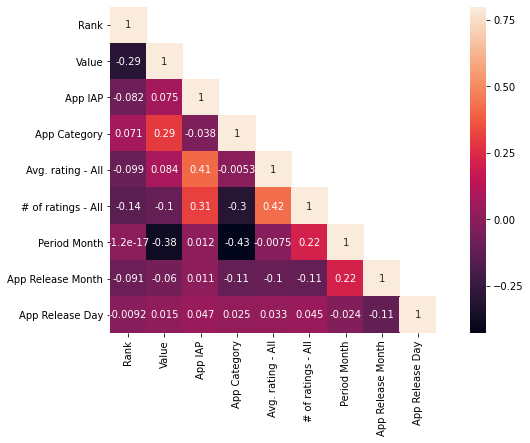

In [61]:
fig, ax=plt.subplots()
fig.set_size_inches(12,6)
sns.heatmap(corrdata_Free, square=True, annot=True, vmax=0.8, mask=mask_Free)

### 히트맵 분석

Rank의 상관관계가 큰 컬럼 : App Category > Period Month > App Release Day

Avg. rating - All의 상관관계가 큰 컬럼 : App IAP > # of ratings - All > Value

App Category의 상관관계가 큰 컬럼 : Rank > Avg. rating - All > Value

App Release Month의 상관관계가 큰 컬럼 : Period Month > # of ratings - All > App IAP

App Release Day의 상관관계가 큰 컬럼 : # of ratings - All > Avg. rating - All > App IAP

## Type2 - Grossing

In [62]:
data_Grossing=data[data['Type']=='Grossing']
data_Grossing.head()

,Rank,Type,Value,Unit,App IAP,App Category,App Start Price,App End Price,App Avg. Price,Avg. rating - All,# of ratings - All,Period Month,App Release Year,App Release Month,App Release Day
200,1,Grossing,693293,USD,True,2,0.0,0.0,0.0,4,4,12,2013,9,30
201,2,Grossing,366008,USD,True,2,0.0,0.0,0.0,4,4,12,2014,3,12
202,3,Grossing,271680,USD,True,12,0.0,0.0,0.0,4,4,12,2012,1,26
203,4,Grossing,260956,USD,True,0,0.0,0.0,0.0,4,4,12,2014,6,10
204,5,Grossing,215080,USD,True,0,0.0,0.0,0.0,4,4,12,2012,11,16


In [63]:
data_Grossing['Unit'].value_counts()

USD    28200
Name: Unit, dtype: int64

In [64]:
data_Grossing['Value'].value_counts()

5549       20
7845       14
933        11
1825       11
1356       11
           ..
2203        1
32922       1
512825      1
24726       1
8880128     1
Name: Value, Length: 20510, dtype: int64

In [70]:
data_Grossing['Value'].describe()

count    2.820000e+04
mean     3.019681e+05
std      1.768786e+06
min      3.680000e+02
25%      2.855000e+03
50%      1.270850e+04
75%      1.218610e+05
max      5.109463e+07
Name: Value, dtype: float64

In [71]:
data_Grossing['Value']=np.where(data_Grossing['Value']>=121861, 4, np.where(data_Grossing['Value']>=12708.5, 3, np.where(data_Grossing['Value']>=2855, 2, 1)))
data_Grossing['Value'].value_counts()

C:\Users\msi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


2    7052
4    7050
3    7050
1    7048
Name: Value, dtype: int64

In [65]:
data_Grossing['App IAP'].value_counts()

True     27750
False      450
Name: App IAP, dtype: int64

In [66]:
data_Grossing['App IAP']=data_Grossing['App IAP'].map(tf_dict)

C:\Users\msi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [67]:
data_Grossing['App Start Price'].value_counts()

0.00     27315
6.99       293
2.99       126
0.99        90
3.99        51
         ...  
5.84         1
19.51        1
7.10         1
3.06         1
2.49         1
Name: App Start Price, Length: 95, dtype: int64

In [68]:
data_Grossing['App End Price'].value_counts()

0.00     27324
6.99       299
2.99       121
0.99        71
3.99        61
         ...  
3.06         1
9.14         1
4.80         1
14.95        1
2.49         1
Name: App End Price, Length: 98, dtype: int64

In [69]:
data_Grossing['App Avg. Price'].value_counts()

0.00     27315
6.99       193
2.99        66
0.99        49
6.86        41
         ...  
4.51         1
15.11        1
13.57        1
16.02        1
4.21         1
Name: App Avg. Price, Length: 213, dtype: int64

In [72]:
data_Grossing=data_Grossing.drop(['Type', 'Unit', 'App Start Price', 'App End Price'], axis='columns')
data_Grossing.head()

,Rank,Value,App IAP,App Category,App Avg. Price,Avg. rating - All,# of ratings - All,Period Month,App Release Year,App Release Month,App Release Day
200,1,4,1,2,0.0,4,4,12,2013,9,30
201,2,4,1,2,0.0,4,4,12,2014,3,12
202,3,4,1,12,0.0,4,4,12,2012,1,26
203,4,4,1,0,0.0,4,4,12,2014,6,10
204,5,4,1,0,0.0,4,4,12,2012,11,16


In [73]:
corrdata_Grossing=data_Grossing[['Rank','Value','App IAP','App Category','App Avg. Price','Avg. rating - All','# of ratings - All', 'Period Month', 'App Release Year', 'App Release Month', 'App Release Day']]
corrdata_Grossing=corrdata_Grossing.corr()
mask_Grossing=np.array(corrdata_Grossing)
mask_Grossing[np.tril_indices_from(mask_Grossing)]=False

In [74]:
print(corrdata_Grossing.Rank.sort_values()[-4:-1])
print()
print(corrdata_Grossing['Avg. rating - All'].sort_values()[-4:-1])
print()
print(corrdata_Grossing['App Category'].sort_values()[-4:-1])
print()
print(corrdata_Grossing['App Release Month'].sort_values()[-4:-1])
print()
print(corrdata_Grossing['App Release Day'].sort_values()[-4:-1])

App Release Month    0.024663
App Category         0.052778
App Avg. Price       0.055875
Name: Rank, dtype: float64

App IAP              -0.004160
Period Month          0.086392
# of ratings - All    0.310605
Name: Avg. rating - All, dtype: float64

App IAP    0.023854
Rank       0.052778
Value      0.212906
Name: App Category, dtype: float64

Period Month      0.022188
Rank              0.024663
App Avg. Price    0.113056
Name: App Release Month, dtype: float64

App Category   -0.003747
Value           0.017234
App IAP         0.090772
Name: App Release Day, dtype: float64


<AxesSubplot:>

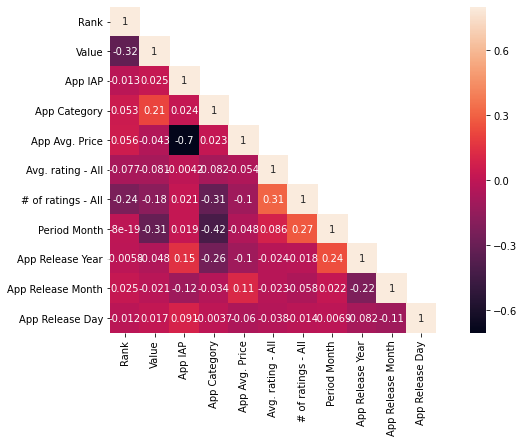

In [75]:
fig, ax=plt.subplots()
fig.set_size_inches(12,6)
sns.heatmap(corrdata_Grossing, square=True, annot=True, vmax=0.8, mask=mask_Grossing)

### 히트맵 분석

Rank의 상관관계가 큰 컬럼 : App Avg. Price > App Category > App Release Month

Avg. rating - All의 상관관계가 큰 컬럼 : # of ratings - All > App Category > App Release Day

App Category의 상관관계가 큰 컬럼 : Rank > Value > App IAP

App Release Month의 상관관계가 큰 컬럼 : # of ratings - All > App Avg. Price > Rank

App Release Day의 상관관계가 큰 컬럼 : App IAP > # of ratings - All > Value

## Type3 - Paid

In [76]:
data_Paid=data[data['Type']=='Paid']
data_Paid.head()

,Rank,Type,Value,Unit,App IAP,App Category,App Start Price,App End Price,App Avg. Price,Avg. rating - All,# of ratings - All,Period Month,App Release Year,App Release Month,App Release Day
100,1,Paid,11842,Downloads,False,1,6.99,6.99,6.99,4,4,12,2011,12,3
101,2,Paid,5880,Downloads,True,1,1.00,0.99,1.00,4,2,12,2014,5,28
102,3,Paid,4199,Downloads,False,11,4.99,4.99,4.08,4,2,12,2014,9,17
103,4,Paid,3946,Downloads,False,2,2.99,2.99,2.86,4,2,12,2014,11,11
104,5,Paid,3565,Downloads,True,15,4.99,4.99,4.21,4,3,12,2013,9,26


In [77]:
data_Paid['Unit'].value_counts()

Downloads    28200
Name: Unit, dtype: int64

In [78]:
data_Paid['Value'].value_counts()

30      689
31      597
60      271
37      259
42      252
       ... 
4987      1
4955      1
6986      1
2888      1
2049      1
Name: Value, Length: 5306, dtype: int64

In [79]:
data_Paid['Value'].describe()

count     28200.000000
mean       1759.726170
std        8211.424322
min          30.000000
25%          62.000000
50%         157.000000
75%         770.000000
max      598572.000000
Name: Value, dtype: float64

In [80]:
data_Paid['Value']=np.where(data_Paid['Value']>=770, 4, np.where(data_Paid['Value']>=157, 3, np.where(data_Paid['Value']>=62, 2, 1)))
data_Paid['Value'].value_counts()

C:\Users\msi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


3    7058
4    7057
1    7045
2    7040
Name: Value, dtype: int64

In [81]:
data_Paid['App IAP'].value_counts()

False    14230
True     13970
Name: App IAP, dtype: int64

In [82]:
data_Paid['App IAP']=data_Paid['App IAP'].map(tf_dict)

C:\Users\msi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [83]:
data_Paid['App Start Price'].value_counts()

0.99     6082
2.99     3635
1.99     3415
4.99     3014
6.99     1935
         ... 
9.56        1
8.87        1
4.95        1
11.70       1
17.54       1
Name: App Start Price, Length: 809, dtype: int64

In [84]:
data_Paid['App End Price'].value_counts()

0.99     5972
2.99     3815
1.99     3435
4.99     2907
6.99     2019
         ... 
5.61        1
3.67        1
9.96        1
12.22       1
2.68        1
Name: App End Price, Length: 759, dtype: int64

In [85]:
data_Paid['App Avg. Price'].value_counts()

0.99     4185
1.99     2252
2.99     2124
4.99     1813
6.99     1316
         ... 
36.62       1
11.99       1
14.29       1
15.35       1
17.29       1
Name: App Avg. Price, Length: 1207, dtype: int64

In [86]:
data_Paid=data_Paid.drop(['Type', 'Unit'], axis='columns')
data_Paid.head()

,Rank,Value,App IAP,App Category,App Start Price,App End Price,App Avg. Price,Avg. rating - All,# of ratings - All,Period Month,App Release Year,App Release Month,App Release Day
100,1,4,0,1,6.99,6.99,6.99,4,4,12,2011,12,3
101,2,4,1,1,1.00,0.99,1.00,4,2,12,2014,5,28
102,3,4,0,11,4.99,4.99,4.08,4,2,12,2014,9,17
103,4,4,0,2,2.99,2.99,2.86,4,2,12,2014,11,11
104,5,4,1,15,4.99,4.99,4.21,4,3,12,2013,9,26


In [87]:
corrdata_Paid=data_Paid[['Rank','Value','App IAP','App Category', 'App Start Price','App End Price','App Avg. Price','Avg. rating - All','# of ratings - All', 'Period Month', 'App Release Month', 'App Release Day']]
corrdata_Paid=corrdata_Paid.corr()
mask_Paid=np.array(corrdata_Paid)
mask_Paid[np.tril_indices_from(mask_Paid)]=False

In [88]:
print(corrdata_Paid.Rank.sort_values()[-4:-1])
print()
print(corrdata_Paid['Avg. rating - All'].sort_values()[-4:-1])
print()
print(corrdata_Paid['App Category'].sort_values()[-4:-1])
print()
print(corrdata_Paid['App Release Month'].sort_values()[-4:-1])
print()
print(corrdata_Paid['App Release Day'].sort_values()[-4:-1])

Period Month      -7.950859e-19
App Release Day    7.090747e-03
App Category       3.451973e-02
Name: Rank, dtype: float64

App IAP               0.060274
Period Month          0.143475
# of ratings - All    0.196709
Name: Avg. rating - All, dtype: float64

App End Price     0.058565
App Avg. Price    0.073224
Value             0.210615
Name: App Category, dtype: float64

App End Price     0.046993
App Avg. Price    0.051143
Period Month      0.078234
Name: App Release Month, dtype: float64

App End Price         0.010854
# of ratings - All    0.011434
App IAP               0.073021
Name: App Release Day, dtype: float64


<AxesSubplot:>

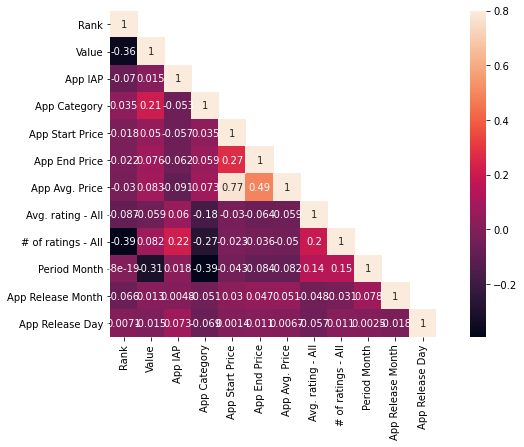

In [89]:
fig, ax=plt.subplots()
fig.set_size_inches(12,6)
sns.heatmap(corrdata_Paid, square=True, annot=True, vmax=0.8, mask=mask_Paid)

### 히트맵 분석

Rank의 상관관계가 큰 컬럼 : App Category > App Release Day > Period Month

Avg. rating - All의 상관관계가 큰 컬럼 : # of ratings - All > Period Month > App IAP

App Category의 상관관계가 큰 컬럼 : App Avg. Price > App End Price > Value

App Release Month의 상관관계가 큰 컬럼 : # of ratings - All > Period Month > App Avg. Price

App Release Day의 상관관계가 큰 컬럼 : App IAP > App End Price > Rank

## test 파일 생성

In [93]:
data_free_col=list(data_Free.columns)
data_free_col

['Rank',
 'Value',
 'App IAP',
 'App Category',
 'Avg. rating - All',
 '# of ratings - All',
 'Period Month',
 'App Release Year',
 'App Release Month',
 'App Release Day']

In [ ]:
test_free=pd.Series([?, 4, 1, 0~24, 4, 4, 1~12, 1~31])

In [94]:
data_grossing_col=list(data_Grossing.columns)
data_grossing_col

['Rank',
 'Value',
 'App IAP',
 'App Category',
 'App Avg. Price',
 'Avg. rating - All',
 '# of ratings - All',
 'Period Month',
 'App Release Year',
 'App Release Month',
 'App Release Day']

In [ ]:
test_grossing=pd.Series([?, 4, 1, 0~24, 4, 4, 1~12, 1~31])

In [ ]:
data_paid_col=list(data_Paid.columns)
data_paid_col

In [ ]:
test_paid=pd.Series([?, 4, 1, 0~24, 4, 4, 1~12, 1~31])

pd.DataFrame(test, columns=col)